In [1]:
import torch
import torchaudio
import matplotlib.pyplot as plt

In [2]:
filename = "./maltalk/1-1.wav"
waveform, sample_rate = torchaudio.load(filename)

In [3]:
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

Shape of waveform: torch.Size([1, 187068])
Sample rate of waveform: 16000


In [4]:
waveform.dtype

torch.float32

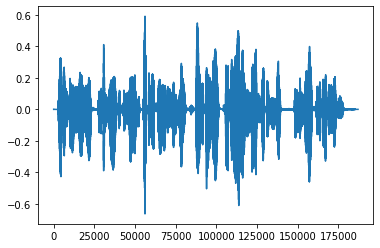

In [5]:
plt.figure()
plt.plot(waveform.t().numpy())

In [6]:
waveform[:10]

tensor([[ 0.0000e+00, -3.0518e-05,  3.0518e-05,  ...,  6.1035e-05,
          3.0518e-05,  0.0000e+00]])

Shape of spectrogram: torch.Size([1, 257, 731])


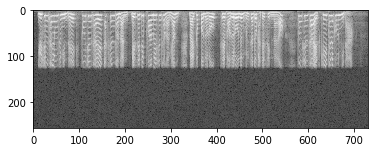

In [7]:
specgram = torchaudio.transforms.Spectrogram(n_fft=512)(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy(), cmap='gray')

Shape of spectrogram: torch.Size([1, 513, 366])


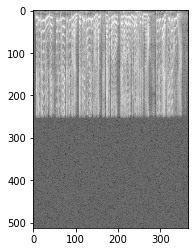

In [8]:
specgram = torchaudio.transforms.Spectrogram(n_fft=1024)(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy(), cmap='gray')

#### Mel Spectrogram on a log scale.

Shape of spectrogram: torch.Size([1, 40, 366])


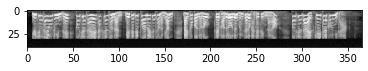

In [9]:
specgram = torchaudio.transforms.MelSpectrogram(sample_rate=16000, n_fft=1024, n_mels=40)(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
p = plt.imshow(specgram.log2()[0,:,:].detach().numpy(), cmap='gray')

In [10]:
sample_rate = 16000.0
n_fft = 1024.0
frame_length = n_fft / sample_rate * 1000.0
frame_shift = frame_length / 2.0

print(frame_length, 'ms')

64.0 ms


In [11]:
params = {
    "channel": 0,
    "dither": 0.0,
    "window_type": "hanning",
    "frame_length": frame_length,
    "frame_shift": frame_shift,
    "remove_dc_offset": False,
    "round_to_power_of_two": False,
    "sample_frequency": sample_rate,
}

### torchaudio-kaldi (spetrogram, fbank, mfcc)

Shape of spectrogram: torch.Size([364, 513])


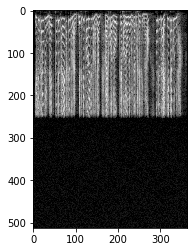

In [12]:
specgram = torchaudio.compliance.kaldi.spectrogram(waveform, **params)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.t().numpy(), cmap='gray')

Shape of fbank: torch.Size([364, 23])


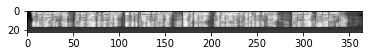

In [13]:
fbank = torchaudio.compliance.kaldi.fbank(waveform, **params)

print("Shape of fbank: {}".format(fbank.size()))

plt.figure()
plt.imshow(fbank.t().numpy(), cmap='gray')

Shape of mfcc: torch.Size([364, 13])


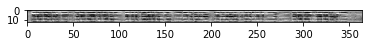

In [14]:
mfcc = torchaudio.compliance.kaldi.mfcc(waveform, **params)

print("Shape of mfcc: {}".format(mfcc.size()))

plt.figure()
plt.imshow(mfcc.t().numpy(), cmap='gray')

In [15]:
for idx, item in enumerate(torchaudio.kaldi_io.read_mat_ark('./raw_fbank_pitch_maltalk_data_to_kaldi.1.ark')):
    print(item[0])
    print(item[1].shape)
    if idx==5:
        break

/home/jieun/Downloads/asr_data/data/maltalk/1-1.wav
torch.Size([1167, 83])
/home/jieun/Downloads/asr_data/data/maltalk/1-2.wav
torch.Size([2680, 83])
/home/jieun/Downloads/asr_data/data/maltalk/10-1.wav
torch.Size([267, 83])
/home/jieun/Downloads/asr_data/data/maltalk/10-2.wav
torch.Size([421, 83])
/home/jieun/Downloads/asr_data/data/maltalk/11-1.wav
torch.Size([246, 83])
/home/jieun/Downloads/asr_data/data/maltalk/11-2.wav
torch.Size([2538, 83])


In [16]:
sample_rate = 8000.0
n_fft = 1024.0
frame_length = n_fft / sample_rate * 1000.0
frame_shift = frame_length / 2.0

print(frame_length, 'ms')

128.0 ms


In [17]:
params = {
    "channel": 0,
    "dither": 0.0,
    "window_type": "hanning",
    "frame_length": frame_length,
    "frame_shift": frame_shift,
    "remove_dc_offset": False,
    "round_to_power_of_two": False,
    "sample_frequency": sample_rate,
}

Shape of spectrogram: torch.Size([364, 513])


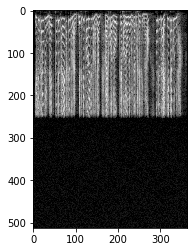

In [18]:
specgram = torchaudio.compliance.kaldi.spectrogram(waveform, **params)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.t().numpy(), cmap='gray')

Shape of fbank: torch.Size([364, 23])


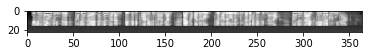

In [19]:
fbank = torchaudio.compliance.kaldi.fbank(waveform, **params)

print("Shape of fbank: {}".format(fbank.size()))

plt.figure()
plt.imshow(fbank.t().numpy(), cmap='gray')

Shape of mfcc: torch.Size([364, 13])


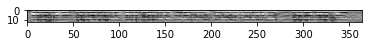

In [20]:
mfcc = torchaudio.compliance.kaldi.mfcc(waveform, **params)

print("Shape of mfcc: {}".format(mfcc.size()))

plt.figure()
plt.imshow(mfcc.t().numpy(), cmap='gray')

### kaldi_io example

In [21]:
import kaldi_io

In [22]:
for idx, item in enumerate(kaldi_io.read_mat_ark('./raw_fbank_pitch_maltalk_data_to_kaldi.1.ark')):
    print(item[0])
    print(item[1].shape)    
    if idx == 3:
        break

/home/jieun/Downloads/asr_data/data/maltalk/1-1.wav
(1167, 83)
/home/jieun/Downloads/asr_data/data/maltalk/1-2.wav
(2680, 83)
/home/jieun/Downloads/asr_data/data/maltalk/10-1.wav
(267, 83)
/home/jieun/Downloads/asr_data/data/maltalk/10-2.wav
(421, 83)
